# Modeling a K-Nearest Neighbor Classfier

Given the categorical nature of our data, a KNN classifier might be best suited to classify attributes and predict whether an employee has mental health issues or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from matplotlib import pyplot
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [2]:
data_tech = pd.read_pickle('data_tech.pkl')

We want to make use of our features to predict whether an employee in the tech-industry would have mental health issues or not. We earlier saw how various factors can possibly correlate to mental health issues, therefore, we can use a few of the general attributes for our model.

First, we need to transform our features into new numerical features that the model could interpret. This process of transforming raw data into encoded features is known as <b>Feature Engineering</b> 

### Feature Engineering

In [3]:
# Predicting Mental Health issue using Work Environment  
data_tech['remote_work'] = data_tech['remote_work'].map({'Yes': 1, 'No': 2})
data_tech['self_employed'] = data_tech['self_employed'].map({'Yes': 1, 'No': 2})

data_tech['gender'] = data_tech['gender'].map({'Male': 1, 'Female': 2, 'Other': 3})
data_tech['family_history'] = data_tech['family_history'].map({'Yes': 1, 'No': 0})
data_tech['treatment'] = data_tech['treatment'].map({'Yes': 1, 'No': 0})

data_tech['issue'] = data_tech['issue'].map({'Yes': 1, 'No': 2})

In [4]:
Feature_set = data_tech.loc[:, ['age', 'gender', 'remote_work', 'family_history','self_employed']].values
Label = data_tech.loc[:, 'issue'].values

In [5]:
print("The Feature Set of our Model:\n\n",Feature_set)

The Feature Set of our Model:

 [[46  1  1  1  1]
 [36  1  1  1  1]
 [29  1  2  1  2]
 ...
 [32  1  1  1  2]
 [34  1  2  1  2]
 [46  2  1  0  2]]


In [6]:
print("Labels:",Label)

Labels: [1 2 1 ... 1 1 2]


### Splitting into Train and Test Sets 

In [5]:
from sklearn.model_selection import train_test_split

We choose our train-test split as 80:20

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Feature_set, Label, test_size=0.20) 
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (810, 5) (810,)
Test set: (203, 5) (203,)


### KNN with 5 Neighbors (Initial Test Run)

We initially create a KNN with 5 neighbors to test its accuracy

In [7]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [8]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy in Percentage:",np.around(((metrics.accuracy_score(y_test, y_pred))*100),decimals=5),"%")

Accuracy in Percentage: 74.87685 %


### Optimization

One of the main parameters for KNN is the number of neighbors. We want to find out for which value of K will the loss be minimized. To do that, we create models for varying values of K, and plot a graph of Error Rate against Number of Neighbors. 

Minimum error:  0.17241 at K = 10


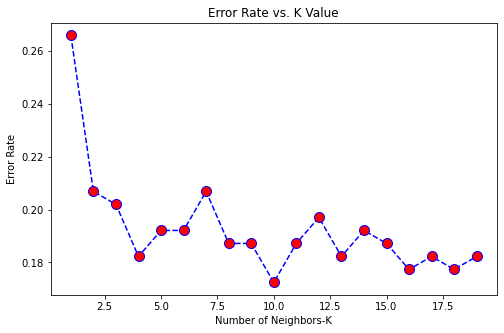

In [11]:
error_rate = []

for i in range(1,20): 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 y_pred = knn.predict(X_test)
 error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(8,5))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of Neighbors-K')
plt.ylabel('Error Rate')

print("Minimum error: ",np.around(min(error_rate),decimals=5),"at K =",1+error_rate.index(min(error_rate)))

#### Similary, we can plot the Accuracy with respect to K

Maximum accuracy: 82.75862 % at K = 10


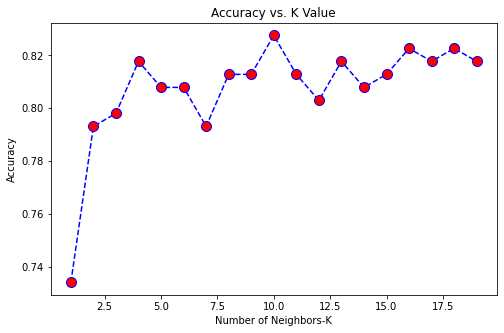

In [12]:
acc = []

from sklearn import metrics
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(8,5))
plt.plot(range(1,20),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('Number of Neighbors-K')
plt.ylabel('Accuracy')

print("Maximum accuracy:",np.around(max(acc)*100,decimals=5),"% at K =", 1+acc.index(max(acc)))

### Conclusion

We finally found an optimal model which predicts with an accuracy of 82.75% with 10 neighbors.

We optimized this entire process by repeating on different values of K, along with changing the split ratios to observe what classifies our set of features well.
